# **Rice Image Classification**

Dataset = Rice Image Dataset ([Source](https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset))

## 1. Library Import

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
#import kaggle
import zipfile
import pathlib
import numpy as np
from PIL import Image
from keras.preprocessing import image
from google.colab import files

## Data Preparation

### Data Loading

In [ ]:
!kaggle datasets download -d muratkokludataset/rice-image-dataset

Dataset URL: https://www.kaggle.com/datasets/muratkokludataset/rice-image-dataset
License(s): CC0-1.0




  0%|          | 0.00/219M [00:00<?, ?B/s]
  0%|          | 1.00M/219M [00:01<04:25, 862kB/s]
  1%|          | 2.00M/219M [00:01<02:10, 1.75MB/s]
  1%|1         | 3.00M/219M [00:01<01:20, 2.80MB/s]
  2%|2         | 5.00M/219M [00:01<00:43, 5.20MB/s]
  3%|3         | 7.00M/219M [00:01<00:29, 7.65MB/s]
  4%|4         | 9.00M/219M [00:01<00:22, 9.69MB/s]
  5%|5         | 11.0M/219M [00:02<00:19, 11.1MB/s]
  6%|5         | 13.0M/219M [00:02<00:17, 12.2MB/s]
  7%|6         | 15.0M/219M [00:02<00:15, 13.6MB/s]
  8%|7         | 17.0M/219M [00:02<00:14, 14.5MB/s]
  9%|8         | 19.0M/219M [00:02<00:14, 14.8MB/s]
 10%|9         | 21.0M/219M [00:02<00:13, 15.4MB/s]
 10%|#         | 23.0M/219M [00:02<00:13, 15.1MB/s]
 11%|#1        | 25.0M/219M [00:02<00:12, 15.8MB/s]
 12%|#2        | 27.0M/219M [00:03<00:12, 15.7MB/s]
 13%|#3        | 29.0M/219M [00:03<00:12, 16.5MB/s]
 14%|#4        | 31.0M/219M [00:03<00:11, 17.0MB/s]
 15%|#5        | 33.0M/219M [00:03<00:11, 17.5MB/s]
 16%|#5        | 35.0

In [2]:
with zipfile.ZipFile("rice-image-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [3]:
data_dir = './Rice_Image_Dataset'
arborio_dir = os.path.join(data_dir, 'Arborio')
basmati_dir = os.path.join(data_dir, 'Basmati')
ipsala_dir = os.path.join(data_dir, 'Ipsala')
jasmine_dir = os.path.join(data_dir, 'Jasmine')
karacadag_dir = os.path.join(data_dir, 'Karacadag')

print(f"There are {len(os.listdir(arborio_dir))} images of arborio.")
print(f"There are {len(os.listdir(basmati_dir))} images of basmati.")
print(f"There are {len(os.listdir(ipsala_dir))} images of ipsala.")
print(f"There are {len(os.listdir(jasmine_dir))} images of jasmine.")
print(f"There are {len(os.listdir(karacadag_dir))} images of karacadag.")

There are 15000 images of arborio.
There are 15000 images of basmati.
There are 15000 images of ipsala.
There are 15000 images of jasmine.
There are 15000 images of karacadag.


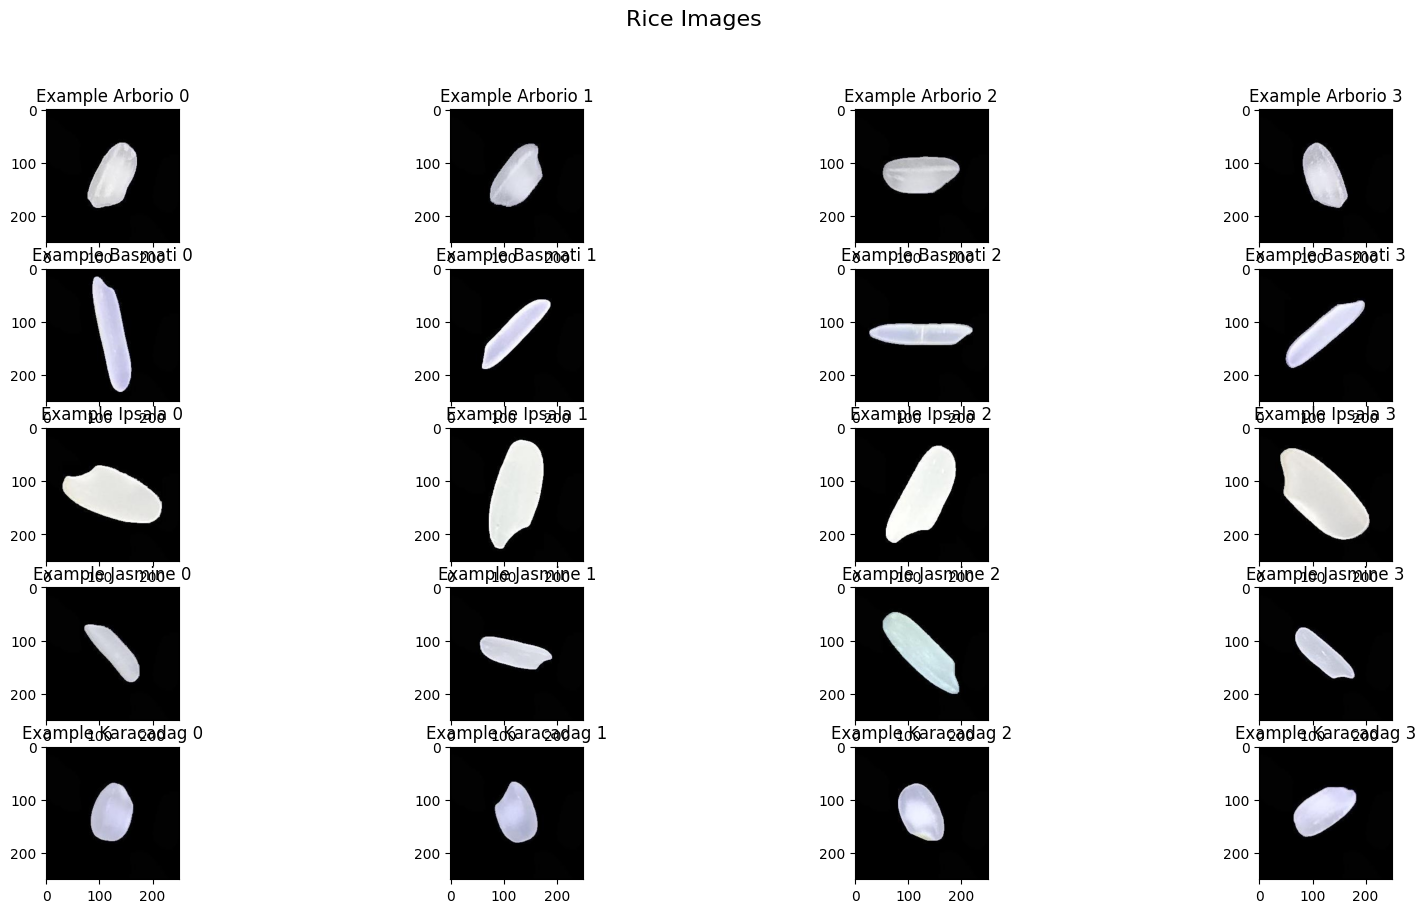

In [4]:
arborio_filenames = [os.path.join(arborio_dir, filename) for filename in os.listdir(arborio_dir)]
basmati_filenames = [os.path.join(basmati_dir, filename) for filename in os.listdir(basmati_dir)]
ipsala_filenames = [os.path.join(ipsala_dir, filename) for filename in os.listdir(ipsala_dir)]
jasmine_filenames = [os.path.join(jasmine_dir, filename) for filename in os.listdir(jasmine_dir)]
karacadag_filenames = [os.path.join(karacadag_dir, filename) for filename in os.listdir(karacadag_dir)]

fig, axes = plt.subplots(5, 4, figsize=(20, 10))
fig.suptitle('Rice Images', fontsize=16)

# Plot the first 4 images of each class
for i, arborio_image in enumerate(arborio_filenames[:4]):
    img = tf.keras.utils.load_img(arborio_image)
    axes[0, i].imshow(img)
    axes[0, i].set_title(f'Example Arborio {i}')

for i, basmati_image in enumerate(basmati_filenames[:4]):
    img = tf.keras.utils.load_img(basmati_image)
    axes[1, i].imshow(img)
    axes[1, i].set_title(f'Example Basmati {i}')

for i, ipsala_image in enumerate(ipsala_filenames[:4]):
    img = tf.keras.utils.load_img(ipsala_image)
    axes[2, i].imshow(img)
    axes[2, i].set_title(f'Example Ipsala {i}')

for i, jasmine_image in enumerate(jasmine_filenames[:4]):
    img = tf.keras.utils.load_img(jasmine_image)
    axes[3, i].imshow(img)
    axes[3, i].set_title(f'Example Jasmine {i}')

for i, karacadag_image in enumerate(karacadag_filenames[:4]):
    img = tf.keras.utils.load_img(karacadag_image)
    axes[4, i].imshow(img)
    axes[4, i].set_title(f'Example Karacadag {i}')

plt.show()

### Data Preprocessing

#### Split Dataset

In [5]:
def train_val_split():
    training_data, validation_data = tf.keras.utils.image_dataset_from_directory(
        directory= data_dir,
        image_size=(150,150),
        batch_size= 128,
        label_mode= 'categorical',
        validation_split= 0.2,
        subset= 'both',
        seed= 42
    )

    return training_data, validation_data

In [6]:
training_data, validation_data = train_val_split()

Found 75000 files belonging to 5 classes.
Using 60000 files for training.
Using 15000 files for validation.


In [7]:
def create_augmentation():
    augmentation_model= tf.keras.Sequential([
        tf.keras.layers.Input(shape=(150,150,3)),
        tf.keras.layers.RandomFlip("horizontal"),
        tf.keras.layers.RandomRotation(0.2, fill_mode='nearest'),
        tf.keras.layers.RandomZoom(0.2, fill_mode='nearest'),
        tf.keras.layers.RandomTranslation(0.2, 0.2, fill_mode='nearest')
    ])

    return augmentation_model

## Modelling

In [8]:
class EarlyStopCallbacks(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs['accuracy'] >= 0.95 and logs['val_accuracy'] >= 0.95:
            self.model.stop_training = True
            print("\nReached 95% Train Accuracy and 95% Validation Accuracy, Model Stop!")

In [9]:
def create_model():
    augmentation_images = create_augmentation()
    model = tf.keras.Sequential([
        tf.keras.Input(shape=(150,150,3)),
        augmentation_images,
        tf.keras.layers.Rescaling(1./255),
        tf.keras.layers.Conv2D(16, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
        tf.keras.layers.MaxPool2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(1024, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(5, activation='softmax')
    ])

    model.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )

    return model

In [20]:
def create_mobilenetv2_model():
    base_model = tf.keras.applications.MobileNetV2(
        input_shape=(150, 150, 3),
        include_top=False,
        weights="imagenet"
    )

    base_model.trainable = False

    model_mobile = tf.keras.Sequential([
        base_model,
        tf.keras.layers.GlobalAveragePooling2D(),
        tf.keras.layers.Dense(1024, activation="relu"),
        tf.keras.layers.Dropout(0.3),
        tf.keras.layers.Dense(5, activation="softmax")
    ])

    model_mobile.compile(
        optimizer=tf.keras.optimizers.Adam(),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )

    return model_mobile

# Membuat model MobileNetV2
model_mobile = create_mobilenetv2_model()
model_mobile.summary()


<ipython-input-20-2b689835f51f>:4: UserWarning: `input_shape` is undefined or non-square, or `rows` is not in [96, 128, 160, 192, 224]. Weights for input shape (224, 224) will be loaded as the default.
  base_model = tf.keras.applications.MobileNetV2(


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 5, 5, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d_1           │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1024)                │       1,311,744 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 5)                   │           5,125 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,574,853 (13.64 MB)

 Trainable params: 1,316,869 (5.02 MB)

 Non-trainable params: 2,257,984 (8.61 MB)

In [21]:
history_mobile = model_mobile.fit(
    training_data,
    epochs=20,
    validation_data=validation_data
)


Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 56s 103ms/step - accuracy: 0.8491 - loss: 0.6196 - val_accuracy: 0.9735 - val_loss: 0.0751
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 69s 81ms/step - accuracy: 0.9667 - loss: 0.0954 - val_accuracy: 0.9793 - val_loss: 0.0587
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9703 - loss: 0.0832 - val_accuracy: 0.9772 - val_loss: 0.0674
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9726 - loss: 0.0737 - val_accuracy: 0.9812 - val_loss: 0.0537
Epoch 5/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 87ms/step - accuracy: 0.9754 - loss: 0.0713 - val_accuracy: 0.9807 - val_loss: 0.0551
Epoch 6/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 81ms/step - accuracy: 0.9761 - loss: 0.0701 - val_accuracy: 0.9821 - val_loss: 0.0494
Epoch 7/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 37s 79ms/step - accuracy: 0.9796 - loss: 0.0609 - val_accuracy: 0.9805 - val_loss: 0.0552
Epoch 8/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 42s 89ms/step - accuracy: 0.9775 - loss: 0.0641 -

## Evaluation and Visualization

In [10]:
model = create_model()
history= model.fit(
    training_data,
    epochs=20,
    validation_data=validation_data,
    callbacks=[EarlyStopCallbacks()]
)

Epoch 1/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 48s 89ms/step - accuracy: 0.7160 - loss: 0.6689 - val_accuracy: 0.7438 - val_loss: 0.8291
Epoch 2/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 74s 81ms/step - accuracy: 0.9632 - loss: 0.1062 - val_accuracy: 0.9303 - val_loss: 0.1885
Epoch 3/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 44s 88ms/step - accuracy: 0.9790 - loss: 0.0602 - val_accuracy: 0.7970 - val_loss: 0.6457
Epoch 4/20
469/469 ━━━━━━━━━━━━━━━━━━━━ 38s 81ms/step - accuracy: 0.9871 - loss: 0.0395 - val_accuracy: 0.8961 - val_loss: 0.3324
Epoch 5/20
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.9879 - loss: 0.0388
Reached 95% Train Accuracy and 95% Validation Accuracy, Model Stop!
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 81ms/step - accuracy: 0.9879 - loss: 0.0389 - val_accuracy: 0.9883 - val_loss: 0.0382


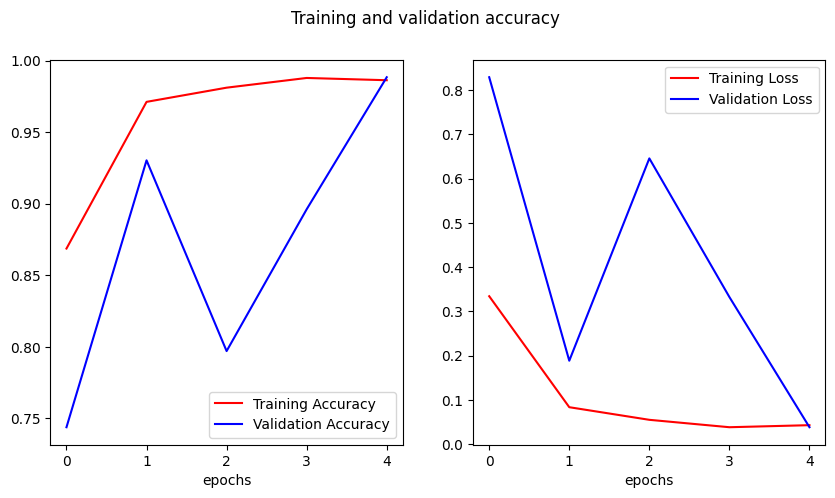

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

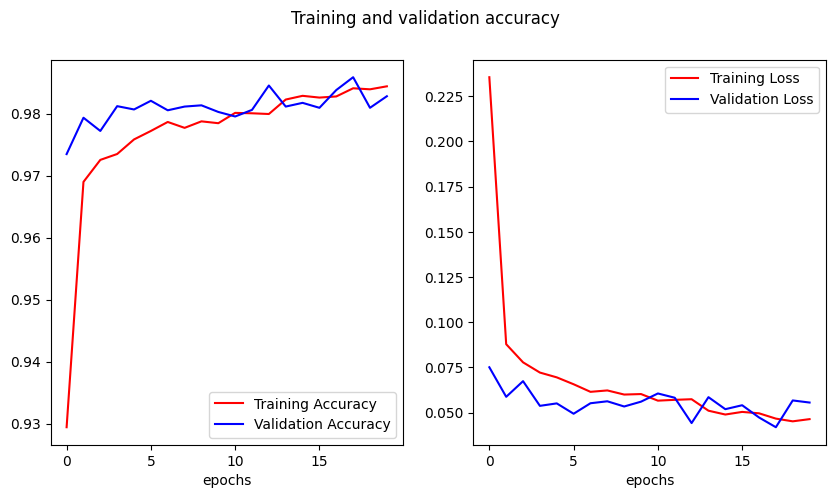

In [32]:
acc = history_mobile.history['accuracy']
val_acc = history_mobile.history['val_accuracy']
loss = history_mobile.history['loss']
val_loss = history_mobile.history['val_loss']

epochs = range(len(acc))

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Training and validation accuracy')

for i, (data, label) in enumerate(zip([(acc, val_acc), (loss, val_loss)], ["Accuracy", "Loss"])):
    ax[i].plot(epochs, data[0], 'r', label="Training " + label)
    ax[i].plot(epochs, data[1], 'b', label="Validation " + label)
    ax[i].legend()
    ax[i].set_xlabel('epochs')

plt.show()

## Model Conversion

In [12]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("model.tflite")
tflite_model_file.write_bytes(tflite_model)

Saved artifact at '/tmp/tmphfox9g9x'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_5')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137879009764432: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137878715515344: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149491600: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149490832: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149490256: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149494096: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149491024: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149495056: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149494480: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149495824: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137876149495

26109084

In [22]:
converter = tf.lite.TFLiteConverter.from_keras_model(model_mobile)
tflite_model = converter.convert()

tflite_model_file = pathlib.Path("model_mobile.tflite")
tflite_model_file.write_bytes(tflite_model)

Saved artifact at '/tmp/tmpafl20zx2'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 150, 150, 3), dtype=tf.float32, name='keras_tensor_334')
Output Type:
  TensorSpec(shape=(None, 5), dtype=tf.float32, name=None)
Captures:
  137873885759248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885758672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885760592: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885760208: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885760016: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885761936: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885762320: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885762704: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885762512: TensorSpec(shape=(), dtype=tf.resource, name=None)
  137873885757904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  1378738857

14132336

Saving download (1).jpg to download (1) (2).jpg
download (1) (2).jpg
[[8.9425790e-01 1.1878996e-06 4.0440387e-05 6.4483881e-02 4.1216578e-02]]
Prediksi: Arborio


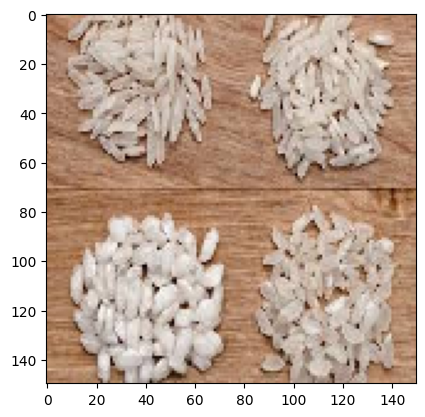

In [33]:
interpreter = tf.lite.Interpreter(model_path="model.tflite")
interpreter.allocate_tensors()
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(150, 150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  x = x / 255.0
  interpreter.set_tensor(input_details[0]['index'], x)
  interpreter.invoke()
  predictions = interpreter.get_tensor(output_details[0]['index'])
  print(fn)
  print(predictions)
  class_index = np.argmax(predictions, axis=1)[0]
  class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
  print(f"Prediksi: {class_labels[class_index]}")

Saving download (2).jpg to download (2) (2).jpg
download (2) (2).jpg
[[2.6114469e-06 9.3782854e-01 3.5712258e-03 5.8597125e-02 4.4428876e-07]]
Prediksi: Basmati


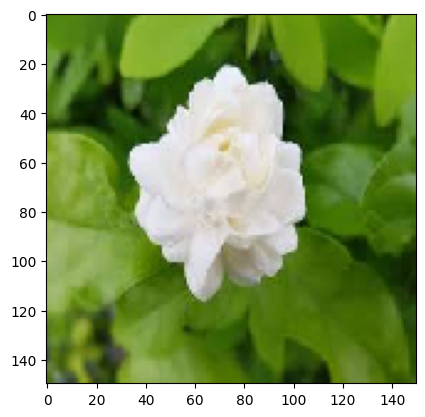

In [29]:
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

interpreter = tf.lite.Interpreter(model_path="model_mobile.tflite")
interpreter.allocate_tensors()

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

uploaded = files.upload()

for fn in uploaded.keys():
    path = fn  # Pastikan path adalah string, bukan tuple
    img = image.load_img(path, target_size=(150, 150))
    imgplot = plt.imshow(img)

    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = tf.keras.applications.mobilenet_v2.preprocess_input(x)  # Normalisasi sesuai MobileNetV2

    interpreter.set_tensor(input_details[0]['index'], x)
    interpreter.invoke()

    predictions = interpreter.get_tensor(output_details[0]['index'])

    print(fn)
    print(predictions)

    class_index = np.argmax(predictions, axis=1)[0]
    class_labels = ['Arborio', 'Basmati', 'Ipsala', 'Jasmine', 'Karacadag']
    print(f"Prediksi: {class_labels[class_index]}")
